<a href="https://colab.research.google.com/github/FathimaNourinDS/Daibeticsclassification/blob/main/polynominalreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.drop(['sno'],axis=1)

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [ ]:
x=df.iloc[:,1:2]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [ ]:
y=df.iloc[:,-1]
y

,Pressure
0,0.0002
1,0.0012
2,0.0060
3,0.0300
4,0.0900
5,0.2700


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

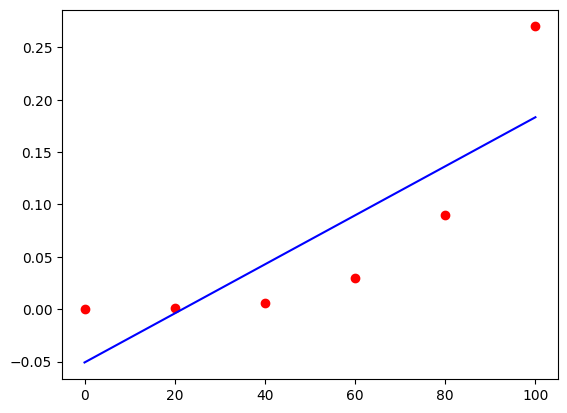

In [ ]:
plt.scatter(x,y,color='r')
plt.plot(x,y_pred,color='b')


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape=mean_absolute_percentage_error(y,y_pred)
mape

44.775078189300416

In [ ]:
r2=r2_score(y,y_pred)
r2

0.690349972603981

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly


array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [ ]:
df1=pd.DataFrame({'Actual':y,'simple_reg':y_pred,'polynominal_reg':y_poly})

In [ ]:
print('mape is',mean_absolute_percentage_error(y,y_poly))

mape is 2.7865912208923658


In [ ]:
print('r2 score is',r2_score(y,y_poly))

r2 score is 0.9966691251761722


Text(0.5, 1.0, 'Polynomial Regression')

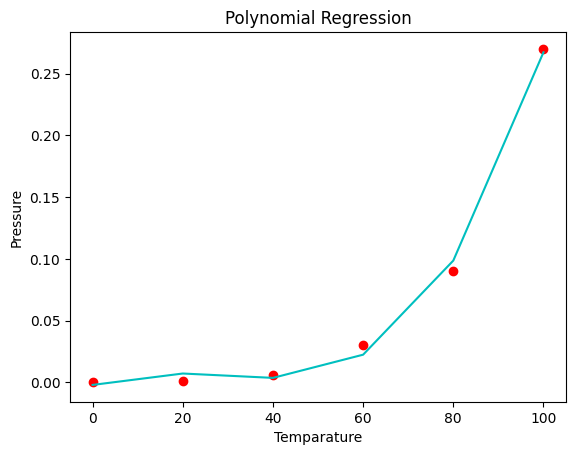

In [ ]:
plt.scatter(x,y,color='r')
plt.plot(x,y_poly,color='c')
plt.xlabel('Temparature')
plt.ylabel('Pressure')
plt.title('Polynomial Regression')